In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Density'>

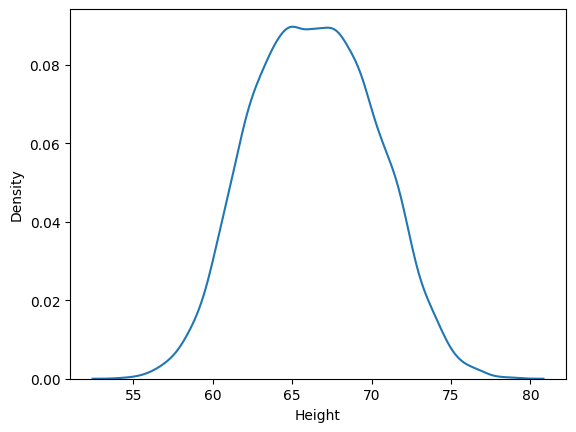

In [32]:
sns.kdeplot(df['Height'])

<Axes: >

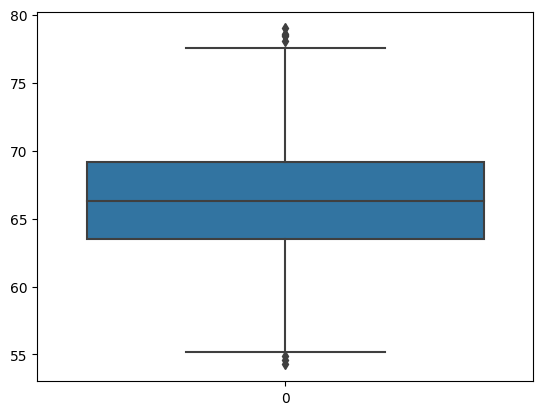

In [33]:
sns.boxplot(df['Height'])

In [34]:
# Setting upper and lower limit

upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [35]:
new_df =  df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


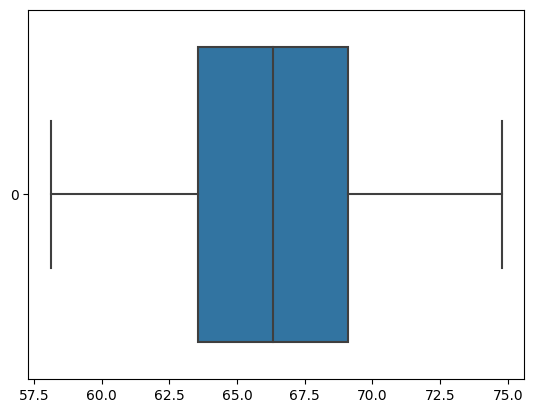

In [36]:
sns.boxplot(new_df['Height'] , orient='h')
plt.show()

In [37]:
# Capping

new_df_cap = df.copy()
new_df_cap['Height'] = np.where(
    
    new_df_cap['Height'] >= upper_limit,
    upper_limit,
    np.where(
        
        new_df_cap['Height'] <= lower_limit,
        lower_limit,
        new_df_cap['Height']
    
    )

)

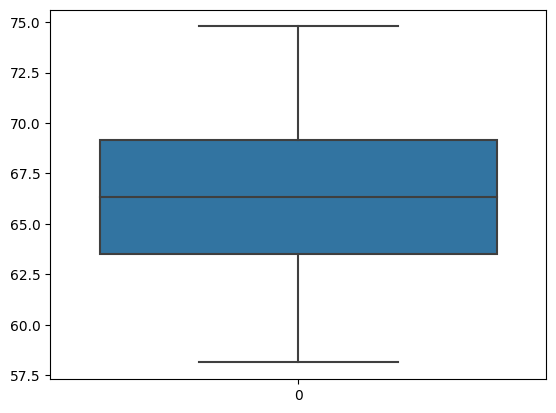

In [38]:
sns.boxplot(new_df_cap['Height'] )
plt.show()

In [42]:
new_df = df.copy()

In [45]:
def cap_data(df):
    df_copy = df.copy()  # Create a copy of the DataFrame slice
    for col in df_copy.columns:
        print("capping the", col)
        if df_copy[col].dtype in [float, int]:  # No need for separate checks
            percentiles = df_copy[col].quantile([0.01, 0.99]).values
            df_copy[col][df_copy[col] <= percentiles[0]] = percentiles[0]
            df_copy[col][df_copy[col] >= percentiles[1]] = percentiles[1]
    return df_copy

final_df = cap_data(new_df[['Height', 'Weight']])
            


capping the Height
capping the Weight


In [46]:
final_df

,Height,Weight
0,73.847017,227.437370
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461
